# **Sampling** through ITT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
np.random.seed(100)

In [3]:
N = 1000 # number of samples

- $\mathcal{U}(0, 1)$

In [4]:
array_samples_uniform = np.random.uniform(0, 1, size=N)

**Cumulative distributive function**
- $F(x) = \begin{cases} 0, & x < 0 \\ \frac{x^2}{3}, & 0 \leq x < 1 \\ \frac{1}{3}, & 1 \leq x < 2 \\ \frac{x+2}{6}, & 2 \leq x < 4 \\ 1, & x \geq 4\end{cases}$

In [5]:
def CDF(x):
    x = np.asarray(x)  # if not an array it changes it into an array

    # numpy.piecewise(x, condlist, funclist, *args, **kw)
    return np.piecewise(x,
                        [x<0, (0 <= x) & (x < 1), (1 <= x) & (x < 2), (2 <= x) & (x < 4), x >= 4],
                        [0, lambda x: x**2/3, 1/3, lambda x: (x + 2)/6, 1])

**Inverse Cumulative Distribution Function**
- $F^{-1}(u) = \begin{cases} \sqrt{3u}, & 0 \leq u < \frac{1}{3} \\ 2, & \frac{1}{3} \leq u \leq \frac{2}{3} \\ 6u - 2, & \frac{2}{3} < u \leq 1 \\ undefined, & otherwise\end{cases}$

In [6]:
def F_inverse(u):
    u = np.asarray(u)

    if np.any((u < 0) | (u > 1)):
        raise ValueError("u must be in [0, 1]")

    return np.piecewise(
        u,
        [u < 1/3, (1/3 <= u) & (u <= 2/3), u > 2/3],
        [lambda u: np.sqrt(3*u), 2, lambda u: 6*u - 2]
    )


In [7]:
array_samples_custom = F_inverse(array_samples_uniform) # inverse of the CDF

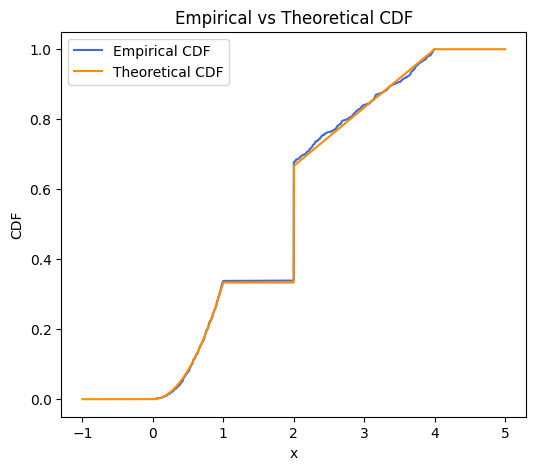

In [8]:
# Sort your sampled points
sorted_samples = np.sort(array_samples_custom)
empirical_cdf = np.arange(1, N+1) / N

# Theoretical CDF for plotting
x_grid = np.linspace(-1, 5, 1000)
theoretical_cdf = CDF(x_grid)

# Plot both
plt.figure(figsize=(6, 5))
plt.plot(sorted_samples, empirical_cdf, label='Empirical CDF', linestyle='-', color='royalblue')
plt.plot(x_grid, theoretical_cdf, label='Theoretical CDF', color='darkorange')
plt.xlabel('x')
plt.ylabel('CDF')
plt.title('Empirical vs Theoretical CDF')
plt.legend()
plt.grid(False)
plt.show()

- **For any given value $x$, the empirical CDF at $x$, denoted $\tilde{F_n}(x)$, is:**
- - $\tilde{F_n}(x) = \frac{number\text{ } of \text{ } samples\text{ } \leq x}{N}$

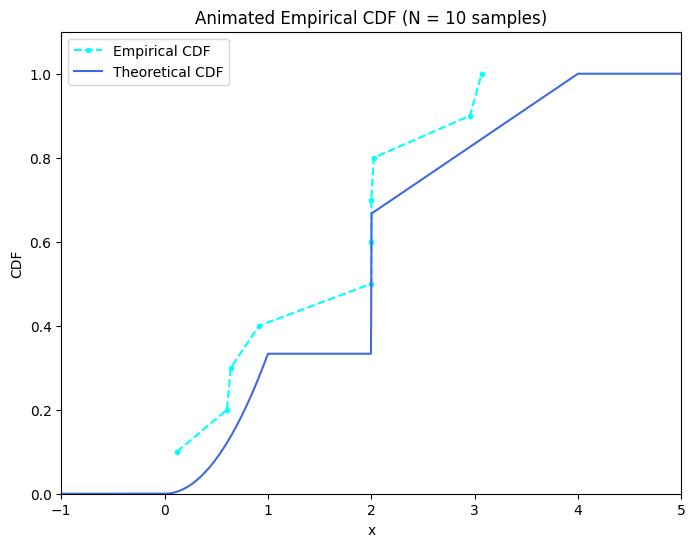

In [9]:
# Animate the Empirical CDF over time

fig, ax = plt.subplots(figsize=(8, 6))

# initializing the animated line
line, = ax.plot([], [], marker='.', linestyle='--',color='cyan', label='Empirical CDF')

# plot the theoretical CDF once
ax.plot(x_grid, theoretical_cdf, color='royalblue', label='Theoretical CDF') # Static
ax.set_xlim(-1, 5)
ax.set_ylim(0, 1.1)
ax.set_xlabel('x')
ax.set_ylabel('CDF')
ax.set_title('Animated Empirical CDF')
ax.grid(False)
ax.legend()

# For each animation frame
def update(frame):
    n = frame
    sorted_partial_samples = np.sort(array_samples_custom[:n])
    empirical_partial_cdf = np.arange(1, n+1) / n
    line.set_data(sorted_partial_samples, empirical_partial_cdf)

    ax.set_title(f"Animated Empirical CDF (N = {n} samples)")
    return line,

frames = np.arange(10, N+1, 1)  # Animate from N=10

ani = animation.FuncAnimation(fig, update, frames=frames, blit=True) # only redraws updated elements (not full plot).

plt.show()


In [10]:
ani.save('CDF_animation.gif', writer='pillow')

# **Wordle**

In [12]:
import csv
import string
import random

In [13]:
word_list = []

with open('wordlist.csv') as f:
  reader = csv.reader(f)
  word_list = list(map(lambda row: row[0].upper(), filter(lambda row: len(row[0]) == 5, reader)))

In [14]:
# word_list[:5]

In [15]:
# to verify
print(f"Number of words: {len(word_list)}")

Number of words: 3103


In [16]:
# for each letter from A to Z of a 5 letter word
positions = [{letter: 0 for letter in string.ascii_uppercase} for _ in range(5)]

In [18]:
for word in word_list:
  for i in range(5):
    letter = word[i]
    positions[i][letter] += 1

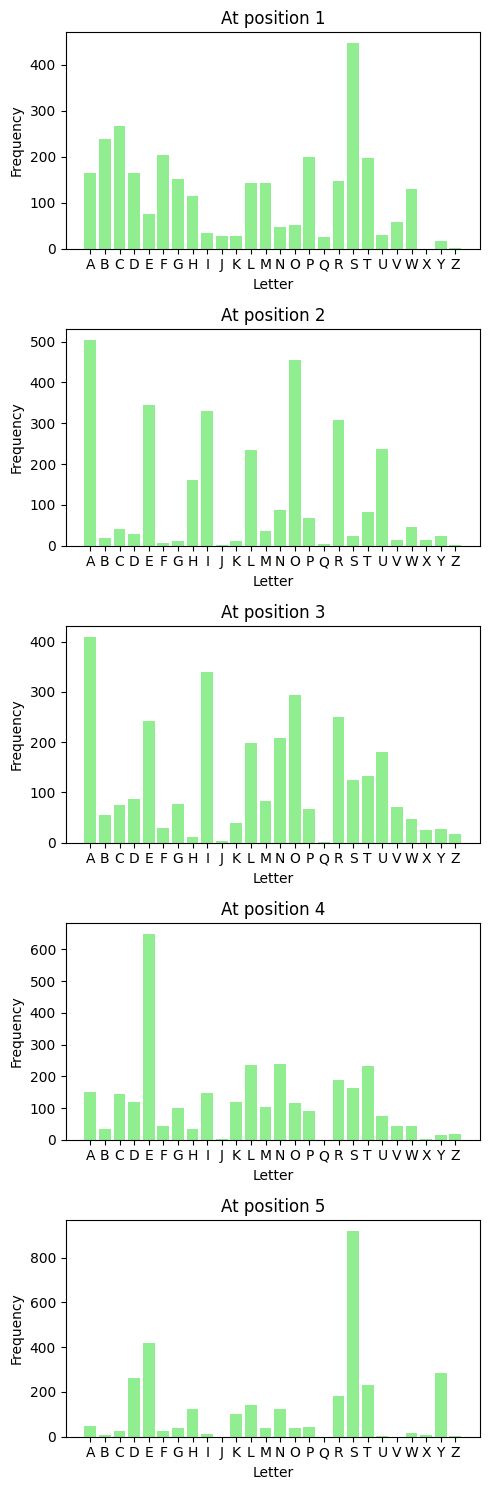

In [23]:
plt.figure(figsize=(5, 15))
for i in range(5):
  plt.subplot(5, 1, i+1)

  pos_data = positions[i]
  letters = sorted(pos_data.keys())
  freq = [pos_data[letter] for letter in letters]

  plt.bar(letters, freq, color='lightgreen')
  plt.title(f"At position {i+1}")
  plt.xlabel('Letter')
  plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [24]:
def wordle_feedback(solution, guess):
  solution = list(solution.upper())
  guess = list(guess.upper())
  result = [''] * 5
  green = yellow = gray = 0

  # first pass for green
  for i in range(5):
    if guess[i] == solution[i]:
      result[i] = guess[i]
      solution[i] = None
      guess[i] = None
      green += 1

  # second pass for yellow and gray
  for i in range(5):
    if guess[i] is not None:
      if guess[i] in solution:
        result[i] = guess[i]
        solution[solution.index(guess[i])] = None
        yellow += 1
      else:
        result[i] = guess[i]
        gray += 1

  return green, yellow, gray

In [25]:
np.random.seed(42)

In [26]:
examples = [
    ("SLATE", "CRANE"),
    ("BRINE", "BRAIN")
]

for solution, guess in examples:
  g, y, r = wordle_feedback(solution, guess)
  print(f"Solution: {solution}, ", end=" ")
  print(f"Guess: {guess}")
  print(f"Green: {g}, Yellow: {y}, Gray: {r}\n")

Solution: SLATE,  Guess: CRANE
Green: 2, Yellow: 0, Gray: 3

Solution: BRINE,  Guess: BRAIN
Green: 2, Yellow: 2, Gray: 1



In [29]:
def estimate_probabilities(word_list, guess_word='CRANE', trials=1000):
  green_count = yellow_count = 0
  memo = {}

  for _ in range(trials):
    solution = random.choice(word_list)

    key = (solution, guess_word)
    if key not in memo:
      memo[key] = wordle_feedback(solution, guess_word)

    green, yellow, r = memo[key]

    if green >= 1:
      green_count += 1
    if yellow == 2:
      yellow_count += 1

  return green_count / trials, yellow_count / trials

In [30]:
prob_green, prob_yellow = estimate_probabilities(word_list)
print(f"Estimated P(at least one green) for CRANE:  {prob_green}")
print(f"Estimated P(exactly two yellow) for CRANE: {prob_yellow}")

Estimated P(at least one green) for CRANE:  0.377
Estimated P(exactly two yellow) for CRANE: 0.253


In [31]:
def is_consistent(candidate, guess, expected_feedback):
  return wordle_feedback(candidate, guess) == expected_feedback

def greedy_guess_average(word_list, target_word, trials=1000):
  total_guesses = 0

  # Memoization dictionary to store the results of wordle_feedback
  wordle_feedback_memo = {}

  for _ in range(trials):
    solution = random.choice(word_list)
    candidates = word_list[:]
    n_guess = 0

    while True:
      guess = random.choice(candidates)
      n_guess += 1

      # Check if the result is already in the memo
      key = (solution, guess)
      if key not in wordle_feedback_memo:
        feedback = wordle_feedback(solution, guess)
        wordle_feedback_memo[key] = feedback
      else:
        feedback = wordle_feedback_memo[key]

      if feedback[0] == 5:
        break

      candidates = list(filter(lambda word: is_consistent(word, guess, feedback), candidates))
    total_guesses += n_guess

  return total_guesses / trials

In [32]:
avg_crane = greedy_guess_average(word_list, "CRANE")
avg_verve = greedy_guess_average(word_list, "VERVE")

print(f"Average guesses to find CRANE: {avg_crane:.2f}")
print(f"Average guesses to find VERVE: {avg_verve:.2f}")

Average guesses to find CRANE: 5.31
Average guesses to find VERVE: 5.36


In [33]:
import cvxpy as cvx
from tqdm import tqdm

In [34]:
def compute_all_probabilities(word_list):
  results = {}
  for word in tqdm(word_list):
    gw, yw = estimate_probabilities(word_list, guess_word=word)
    results[word] = {'gw': gw, 'yw': yw,}
  return results


In [35]:
def get_best_word(results):
  s1_word = max(results, key=lambda word: results[word]['gw'])
  s2_word = max(results, key=lambda word: results[word]['yw'])
  return {
      'S1': (s1_word, results[s1_word]['gw']),
      'S2': (s2_word, results[s2_word]['yw'])
  }

In [36]:
def optimize_alpha(results):
  alpha = cvx.Variable()
  values = []

  for word in results:
    gw = results[word]['gw']
    yw = results[word]['yw']
    values.append(alpha * gw + (1 - alpha) * yw)

  objective = cvx.Maximize(cvx.sum(values))
  constraints = [0 <= alpha, alpha <= 1]
  prob = cvx.Problem(objective, constraints)
  prob.solve()

  return alpha.value

In [37]:
def best_word_for_alpha(alpha_star, results):
    best_word = None
    best_score = float('inf')

    for word, scores in results.items():
        value = alpha_star * scores['gw'] + (1 - alpha_star) * scores['yw']
        if value < best_score:
            best_score = value
            best_word = word

    return best_word, best_score


In [38]:
results = compute_all_probabilities(word_list)
best_words = get_best_word(results)
alpha_star = optimize_alpha(results)
s3_word, score = best_word_for_alpha(alpha_star, results)

100%|██████████| 3103/3103 [32:10<00:00,  1.61it/s]
/usr/local/lib/python3.11/dist-packages/cvxpy/problems/problem.py:158: UserWarning: Objective contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn("Objective contains too many subexpressions. "


In [41]:
print(f"S1 Best Word: {best_words['S1'][0]} with gw = {best_words['S1'][1]}")
print(f"S2 Best Word: {best_words['S2'][0]} with yw = {best_words['S2'][1]}")
print(f"Optimal alpha: {alpha_star:.2f}")
print(f"S3 Best Word: {s3_word} with score = {score:.2f}")

S1 Best Word: PRIES with gw = 0.622
S2 Best Word: OSIER with yw = 0.38
Optimal alpha: 1.00
S3 Best Word: OFFAL with score = 0.10
